### Studio del comportamento del ENC in funzione delle capacità $C_D$ con soglia ~1000e e $I_{LDAC}$ ~ $14 \mu A$

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [2]:
%run ./Functions/selectFiles.ipynb #gestisce button e schermata di dialogo con il file system
%run ./Functions/parseCalibs.ipynb #parsing dei file txt. input: path[]; output: dataframe[]

In [3]:
button = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test capacit/calib_CD_0_I_LDAC_14_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test capacit/calib_CD_50_I_LDAC_14_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test capacit/calib_CD_100_I_LDAC_14_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test capacit/calib_CD_150_I_LDAC_14_0_soglia_1000_elettroni.txt


In [4]:
data = parseCalibs(button.files) #estrapolo i dati dei file di configurazione

4 dataframe crated!


In [5]:
capac = [0.0, 50.0, 100.0, 150.0]

In [6]:
def getErrorFunctionSigma(dataframe, tipo):
    data = []    
    for i in dataframe:
        filtered_type = i[0].loc[(i[0]['Tipo'] == tipo) & (i[0]['Channel'] != 67.0) & (i[0]['Channel'] != 100.0)] ###attenzione!!
        sigmas = filtered_type['ErrFunSigma'].values.tolist()
        data.append(sigmas)
    return data

In [7]:
sigmasA = getErrorFunctionSigma(data, "A")
sigmasB = getErrorFunctionSigma(data, "B")

In [8]:
ENC_B = []
for i in sigmasB:
    ENC_B.append(np.mean(np.asarray(i)))

In [9]:
ENC_B

[1.2375000000000003, 1.582142857142857, 2.135267857142857, 2.6947321428571427]

In [10]:
ENC_A = []
for i in sigmasA:
    ENC_A.append(np.mean(np.asarray(i)))

In [11]:
ENC_A

[1.3188799999999998,
 1.5629600000000003,
 2.1181599999999996,
 2.5838400000000004]

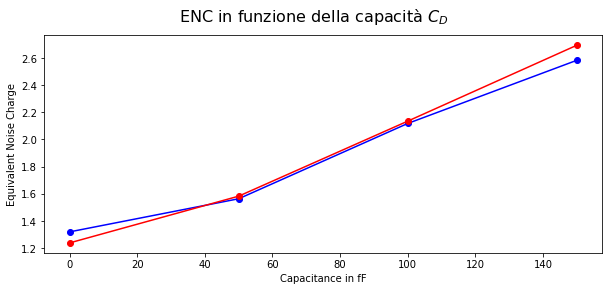

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10,4))

ax.plot(capac, ENC_A, '-o', color ="blue")
ax.plot(capac, ENC_B, '-o', color = "red")
ax.set_xlabel("Capacitance in fF")
ax.set_ylabel("Equivalent Noise Charge")

fig.suptitle("ENC in funzione della capacità $C_D$", fontsize=16)
plt.show()

   

In [13]:
import pandas as pd
import os

destination_folder = "pippo/export"
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

for i in data:
    # determining the name of the file
    file_name = destination_folder+"/"+i[1]
  
    # saving the excel
    i[0].to_excel(file_name + '.xlsx')
    print('DataFrame is written to Excel File ' + file_name+ ' successfully.')

DataFrame is written to Excel File pippo/export/calib_CD_0_I_LDAC_14_0_soglia_1000_elettroni successfully.
DataFrame is written to Excel File pippo/export/calib_CD_50_I_LDAC_14_0_soglia_1000_elettroni successfully.
DataFrame is written to Excel File pippo/export/calib_CD_100_I_LDAC_14_0_soglia_1000_elettroni successfully.
DataFrame is written to Excel File pippo/export/calib_CD_150_I_LDAC_14_0_soglia_1000_elettroni successfully.
